# Explore here

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')

df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [3]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column+'_num'] = pd.factorize(df[column])[0]

In [6]:
df2 = df.drop(['COUNTY_NAME','STATE_NAME'], axis = 1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to STATE_NAME_num
dtypes: float64(61), int64(47)
memory usage: 2.6 MB


In [8]:
df2.drop_duplicates(inplace=True)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to STATE_NAME_num
dtypes: float64(61), int64(47)
memory usage: 2.6 MB


In [10]:
df2['diabetes_prevalence'].describe()

count    3140.000000
mean       13.073503
std         2.724351
min         6.100000
25%        11.200000
50%        12.800000
75%        14.800000
max        25.600000
Name: diabetes_prevalence, dtype: float64

In [12]:
for column in df2.columns:
    nulos = df2[column].isnull().sum()
    if nulos > 0:
        print(column)

In [13]:
for column in df2.columns:
    if 'diabetes' in column:
        if column != 'diabetes_prevalence':
            print(column)
            df2.drop(column,axis=1,inplace=True)

diabetes_Lower 95% CI
diabetes_Upper 95% CI
diabetes_number


In [15]:
df = df[['Percent of adults with a high school diploma only 2014-18','Percent of Population Aged 60+','Heart disease_Upper 95% CI','diabetes_prevalence']]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 4 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Percent of adults with a high school diploma only 2014-18  3140 non-null   float64
 1   Percent of Population Aged 60+                             3140 non-null   float64
 2   Heart disease_Upper 95% CI                                 3140 non-null   float64
 3   diabetes_prevalence                                        3140 non-null   float64
dtypes: float64(4)
memory usage: 98.2 KB


,Percent of adults with a high school diploma only 2014-18,Percent of Population Aged 60+,Heart disease_Upper 95% CI,diabetes_prevalence
0,32.6,19.1,8.7,12.9
1,27.6,26.3,8.7,12.0
2,35.7,23.5,11.8,19.7
3,47.3,21.1,9.3,14.1
4,34.0,23.6,10.1,13.5


In [22]:
df[['Percent of adults with a high school diploma only 2014-18','Percent of Population Aged 60+','Heart disease_Upper 95% CI','diabetes_prevalence']].describe()

,Percent of adults with a high school diploma only 2014-18,Percent of Population Aged 60+,Heart disease_Upper 95% CI,diabetes_prevalence
count,3140.000000,3140.000000,3140.000000,3140.000000
mean,34.285669,24.736943,9.454395,13.073503
std,7.193125,5.564871,1.920387,2.724351
min,5.500000,5.800000,3.700000,6.100000
25%,29.800000,21.200000,8.200000,11.200000
50%,34.600000,24.400000,9.400000,12.800000
75%,39.300000,27.800000,10.700000,14.800000
max,55.600000,64.200000,16.400000,25.600000


/tmp/ipykernel_3275/2442453737.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Gráfico_Percent_of_adults_with_a_high_school_diploma_only_2014_18.set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)
/tmp/ipykernel_3275/2442453737.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Gráfico_Percent_of_Population_Aged_60.set_xticklabels(axis[0,1].get_xticklabels(), rotation=90)
/tmp/ipykernel_3275/2442453737.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Gráfico_Heart_disease_Upper_95_CI.set_xticklabels(axis[1,0].get_xticklabels(), rotation=90)


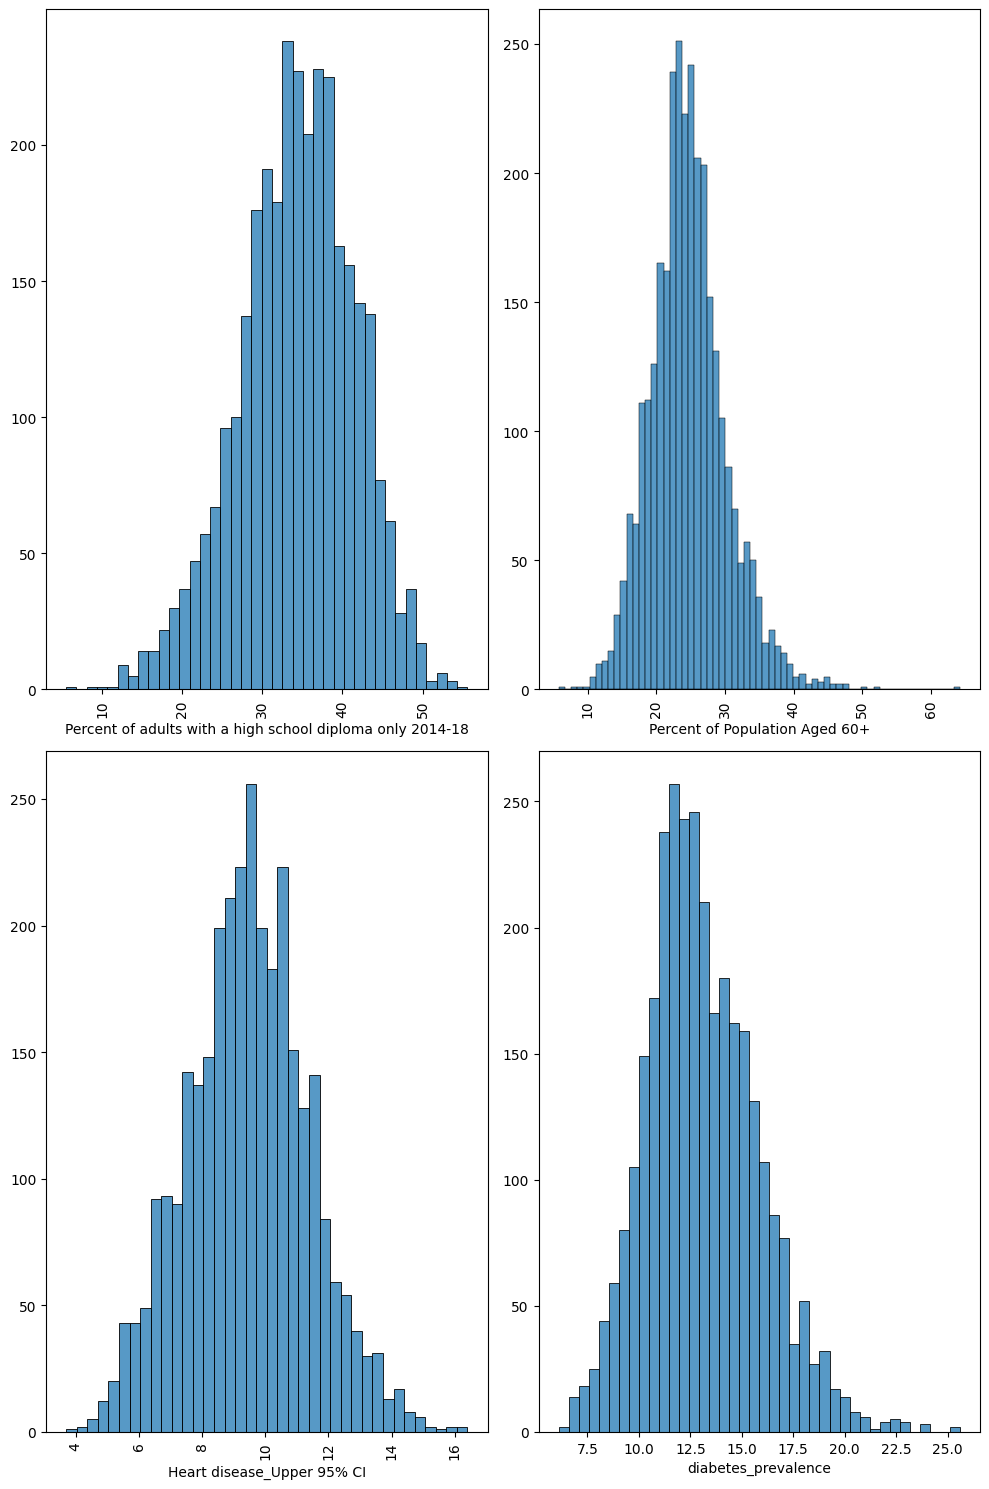

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize = (10, 15))

Gráfico_Percent_of_adults_with_a_high_school_diploma_only_2014_18 = sns.histplot(ax=axis[0,0],data=df, x='Percent of adults with a high school diploma only 2014-18')
Gráfico_Percent_of_adults_with_a_high_school_diploma_only_2014_18.set_ylabel('')
Gráfico_Percent_of_adults_with_a_high_school_diploma_only_2014_18.set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)

Gráfico_Percent_of_Population_Aged_60= sns.histplot(ax=axis[0,1],data=df, x='Percent of Population Aged 60+')
Gráfico_Percent_of_Population_Aged_60.set_ylabel('')
Gráfico_Percent_of_Population_Aged_60.set_xticklabels(axis[0,1].get_xticklabels(), rotation=90)

Gráfico_Heart_disease_Upper_95_CI= sns.histplot(ax=axis[1,0],data=df, x='Heart disease_Upper 95% CI')
Gráfico_Heart_disease_Upper_95_CI.set_ylabel('')
Gráfico_Heart_disease_Upper_95_CI.set_xticklabels(axis[1,0].get_xticklabels(), rotation=90)

diabetes_prevalence=sns.histplot(ax=axis[1,1],data=df, x='diabetes_prevalence')
diabetes_prevalence.set_ylabel('')

plt.tight_layout()
plt.show()